# Tabular Playground Series - Jul 2022

For this challenge, you are given (simulated) manufacturing control data that can be **clustered** into different control states. Your task is to cluster the data into these control states. You are not given any training data, and you are not told how many possible control states there are. This is a completely unsupervised problem, one you might encounter in a real-world setting.

Use cases of unsupervised learning:
* Segmenting datasets by some common attributes.
* Detect anomalies that do not fit into any group.
* Simplify datasets by aggregating variables with similar attributes.



In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from google.colab import drive
drive.mount('/datasets/')

Drive already mounted at /datasets/; to attempt to forcibly remount, call drive.mount("/datasets/", force_remount=True).


### Data Ingestion

In [11]:
# read data 
df = pd.read_csv('/datasets/MyDrive/datasets/Tabular Playground Series - Jul 2022.csv')

# save id column to save the predictions 
submit_id = df['id']

df.head().append(df.tail())

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211
97999,97999,0.755170,0.567483,1.456767,-0.579071,-0.048474,-1.206240,0.784305,0,11,...,1.180805,-0.925705,-1.368680,-2.465425,1.453582,-1.685122,0.129689,-0.970897,1.404988,-0.711098


In [12]:
print('Number of features', df.shape[1])
print('Number of observations', df.shape[0])

Number of features 30
Number of observations 98000


### Data Preprocessing

In [ ]:
df_proc = df.copy().drop('id', axis=1)

Let's check basic information about the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [ ]:
df.isnull().sum()

id      0
f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [ ]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


To sum up, there is no need to produce type convertion and missing data imputation. But before applying a clustering algorithm we need to scale the data.

### EDA

As it was shown above, this dataset contains 28 features of a numeric datatype. The main idea of this EDA is to understand the distribution of the features and determine the number of clusters. 

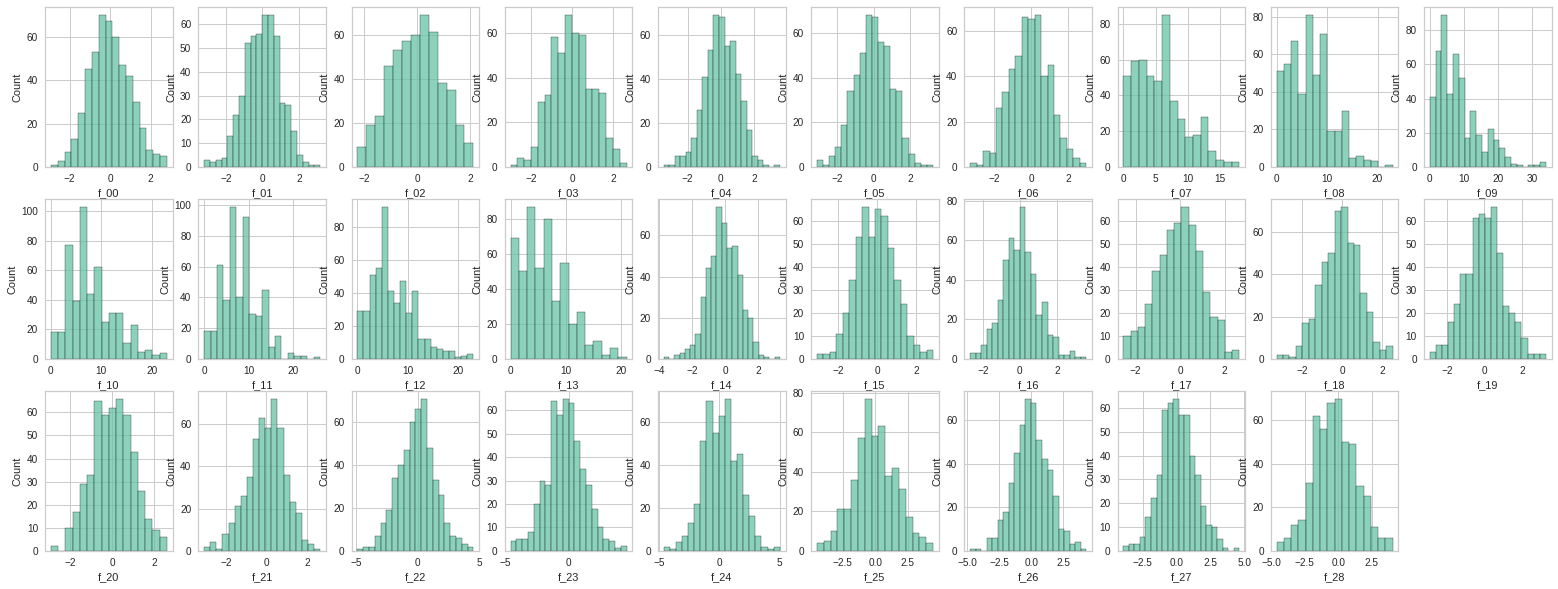

In [ ]:
# create a ubset of observations
df_subset = df_proc.sample(500)

sns.set_palette("Set2")
plt.figure(figsize=(27, 10))
for i, column in enumerate(list(df_proc.columns), 1):
    plt.subplot(3,10, i)
    sns.histplot(x=column, data=df_subset)

Most of the features are normally distributed. Features **f_07-f_13** are right-skewed. Let's check outliers.

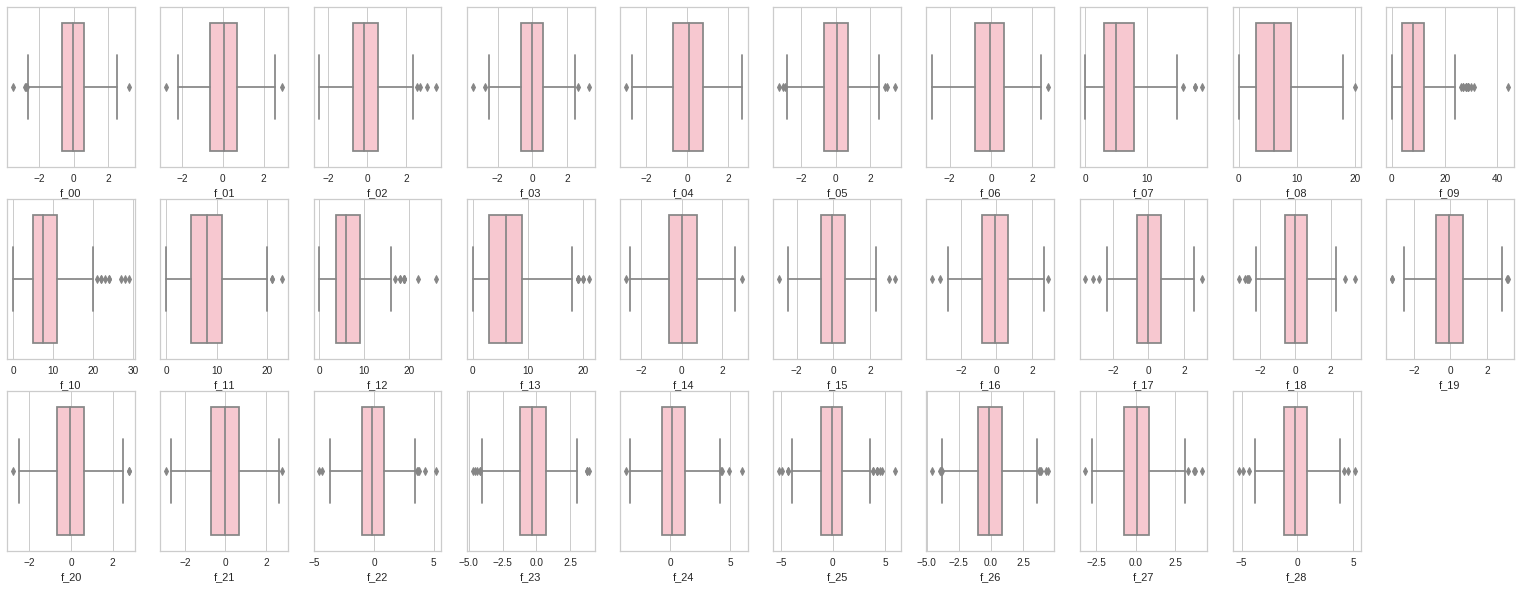

In [ ]:
sns.set_palette("Set1")
plt.figure(figsize=(27, 10))
for i, column in enumerate(list(df_proc.columns), 1):
    plt.subplot(3,10, i)
    sns.boxplot(x=column, data=df_subset, color='pink')

Most of the outliers are detected in those features which were skewed. Maybe, some features are correlated?

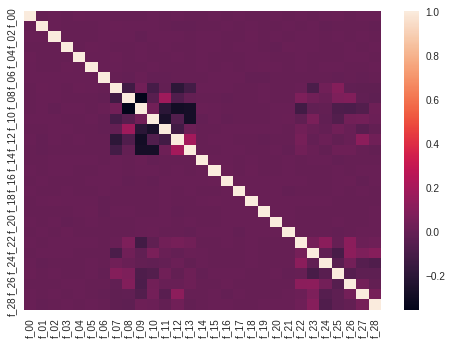

In [ ]:
sns.heatmap(df_proc.corr())

There is no high correlation among the features in dataset.
The main aim of this EDA is to determine the number of clusters, let's create a subset.

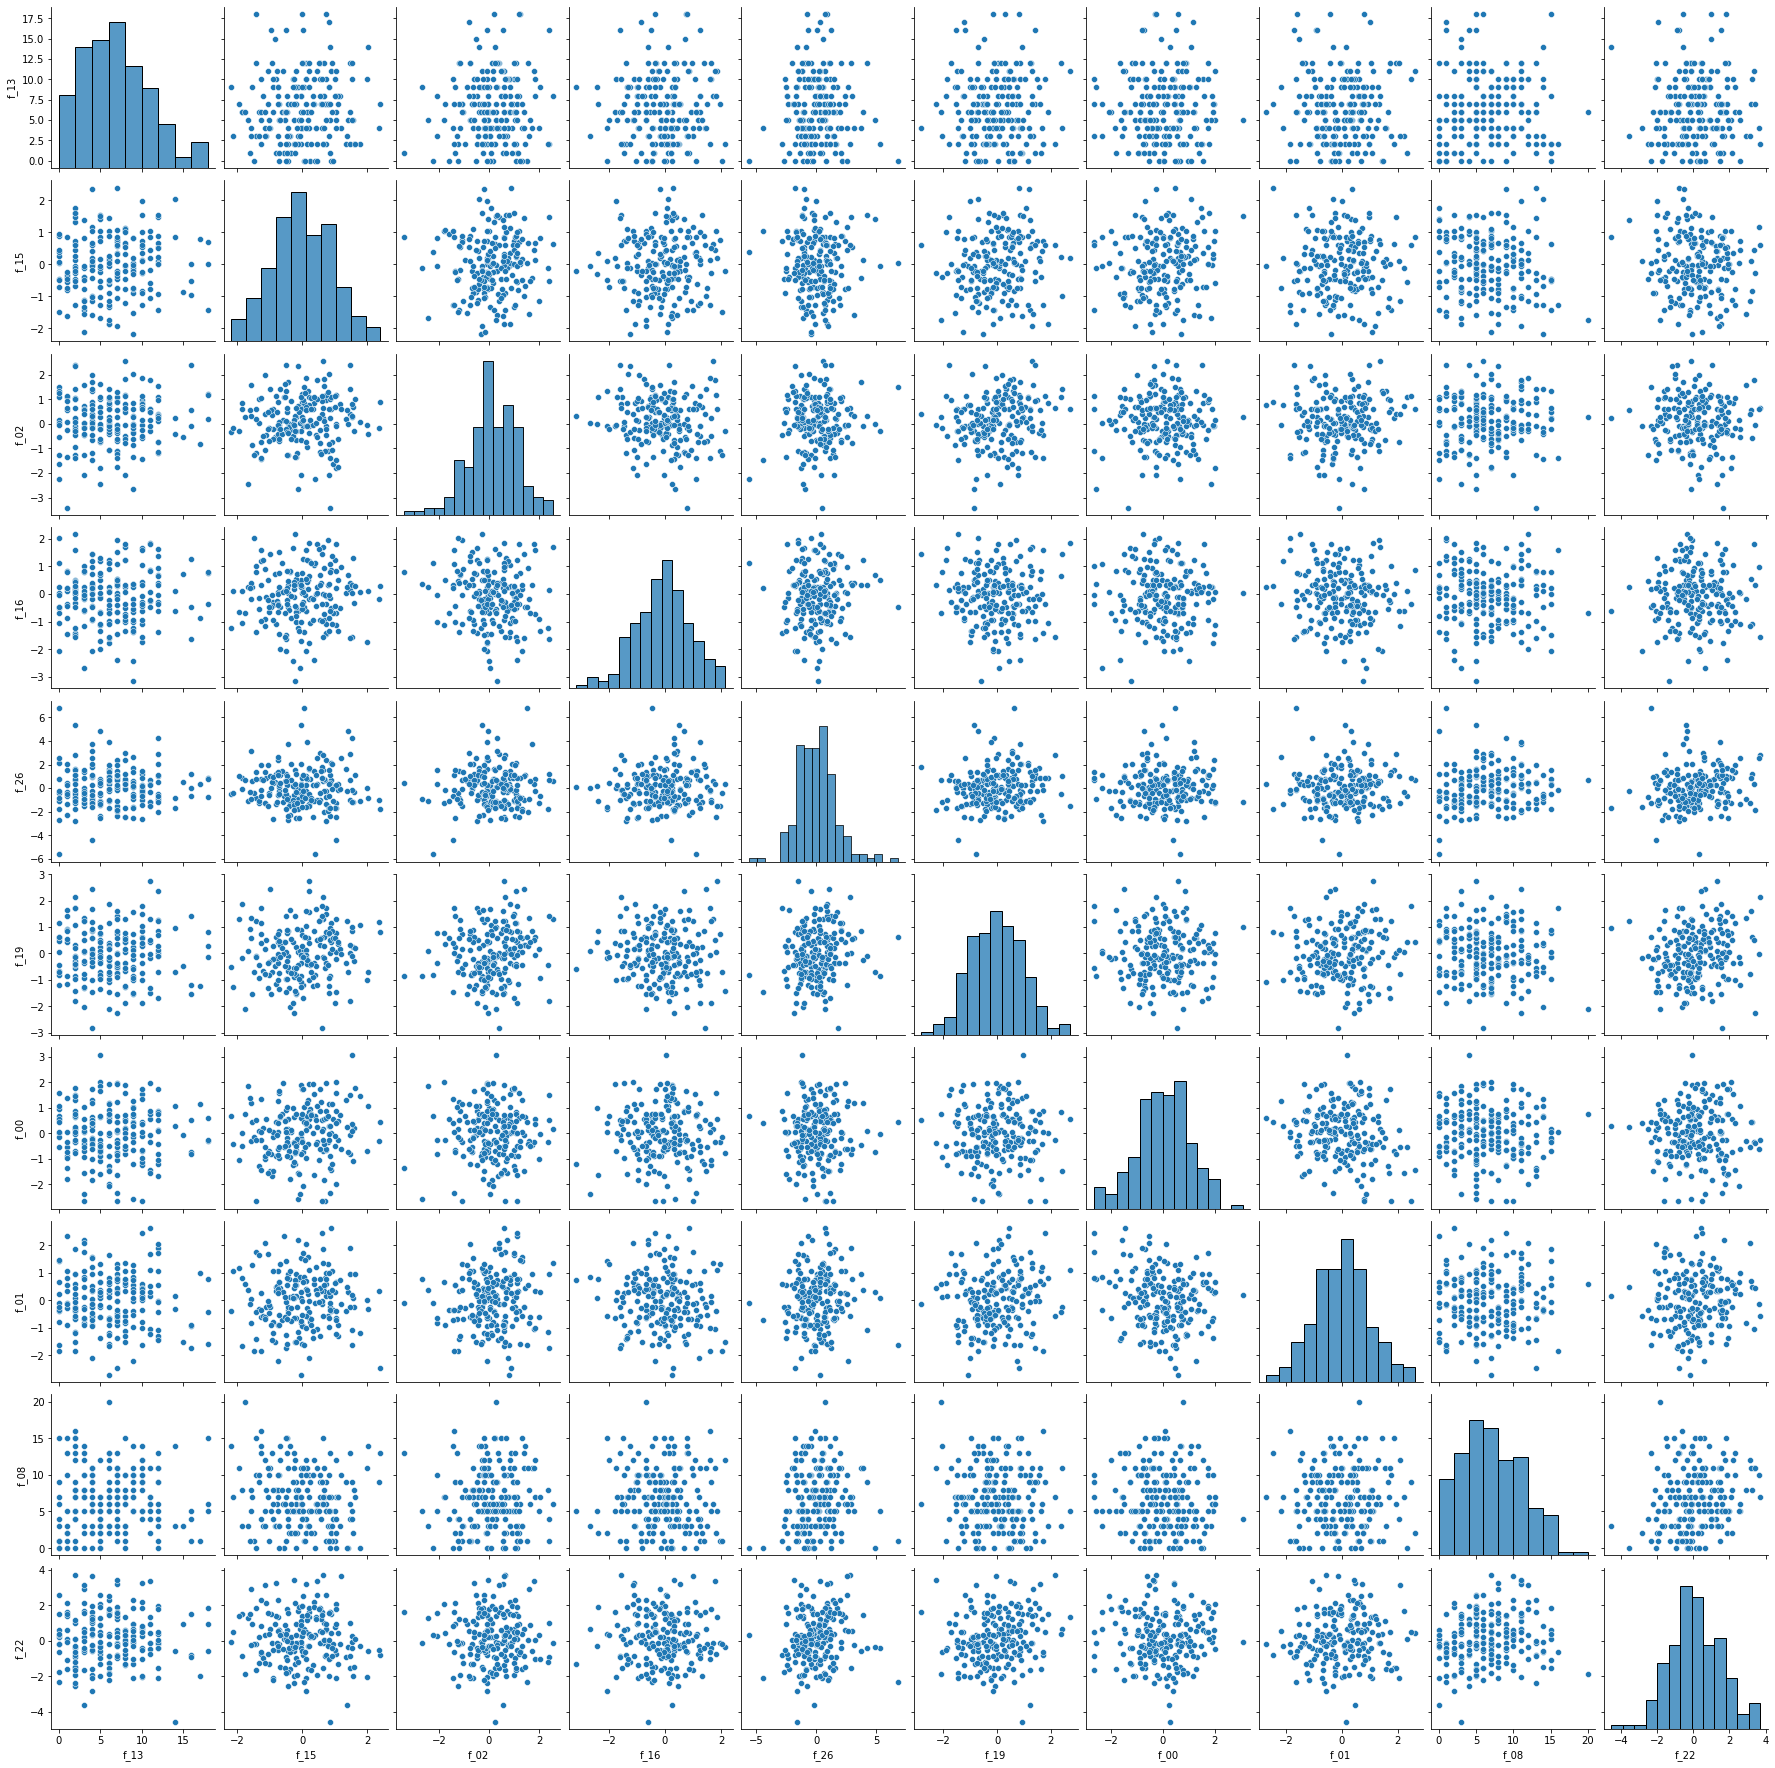

In [ ]:
df_subset = df_proc.sample(10, axis=1).sample(200)
sns.pairplot(df_subset)

On the above plot we can't clearly set separated set of point, so it means that we need to have an extra research, consearning the number of clusters.

From the above data exploration I see the need in following data transformation:  
• data standartization.

In [ ]:
# standartization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_proc)

#### Modeling

Before applying clustering algorims let's explore, how much clusters do we need to specify?

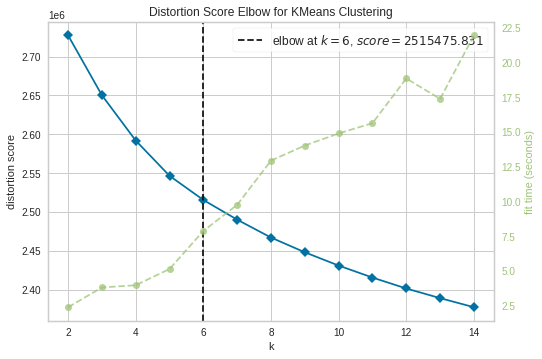

In [ ]:
# elbow method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings=True)
visualizer.fit(df_scaled)
visualizer.show()

#### KMeans (6 clusters)

In [19]:
from sklearn.metrics import silhouette_score

k_means_6 = KMeans(n_clusters=6).fit(df_scaled)
print('Silhouette score:', silhouette_score(df_scaled, k_means_6.labels_))

#### KMeans + PCA (6 clusters)

Here we've introduced dimentional reduction technique — PCA (80% of variance explained)

In [24]:
from sklearn.decomposition import PCA

In [ ]:
# dimention reduction
pca = PCA(n_components=0.80)
df_reduced = pca.fit_transform(df_scaled)

k_means_6 = KMeans(n_clusters=6).fit(df_reduced)
print('Silhouette score:', silhouette_score(df_reduced, k_means_6.labels_))

Silhouette score: 0.04065286773229418


There is no significant improvement. Let's try another algorithm.

### Gaussian Mixtures (6 clusters)

After the couple of sumbissions it seems that KMeans has produced worse results than GMM. So I've focused on GMM.

In [17]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=6, random_state=42).fit(df_scaled)
labels = gmm.predict(df_scaled)
print('Silhouette score:', silhouette_score(df_scaled, labels))

Silhouette score: 0.021405720084348625


In [ ]:
# + PCA
gmm = GaussianMixture(n_components=6, random_state=42).fit(df_reduced)
labels = gmm.predict(df_reduced)
print('Silhouette score:', silhouette_score(df_reduced, labels))

Silhouette score: 0.031216472768917234


The optimal number of clusters was evaluated with the KMeans algorithm. Now, we should determine the optimal number of clusters for GMM.

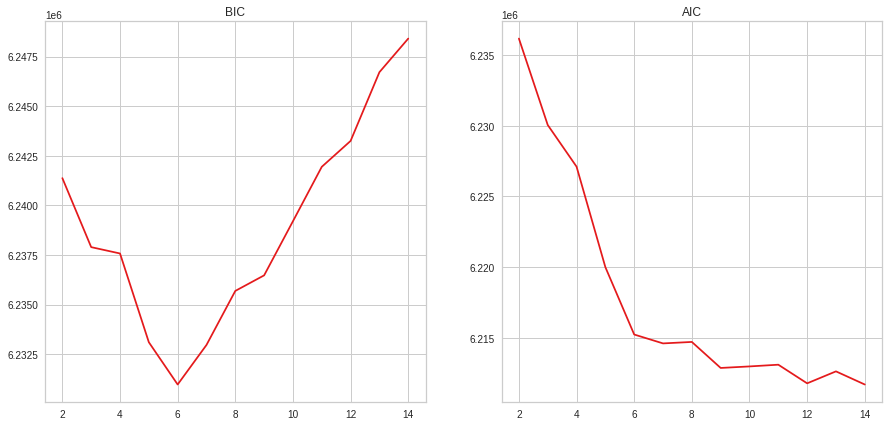

In [ ]:
n_components = np.arange(2, 15, 1)

gmm_models = [GaussianMixture(n_components=component, random_state=42).fit(df_reduced) for component in n_components]
bic = [model.bic(df_reduced) for model in gmm_models]
aic = [model.aic(df_reduced) for model in gmm_models]

f, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(n_components, bic)
ax[0].set_title('BIC')

ax[1].plot(n_components, aic)
ax[1].set_title('AIC')
plt.show()

The lower BIC the better. We see, that both Elbow methon (with KMeans) and custom GMM number of the cluster check provide the same result.Let's see how the model will behave in different variations.

In [ ]:
covariance_type = ['full', 'tied', 'diag', 'spherical']

gmm_models = [GaussianMixture(n_components=6, covariance_type=cov_type, random_state=42).fit(df_reduced) for cov_type in covariance_type]
bic = [model.bic(df_reduced) for model in gmm_models]
aic = [model.aic(df_reduced) for model in gmm_models]

print(list(zip(covariance_type, bic, aic)))

[('full', 6230970.963299302, 6215260.5071353875), ('tied', 6240837.672925873, 6237135.511050388), ('diag', 6238860.141907014, 6236306.5994852055), ('spherical', 6247663.0475594085, 6246305.588205064)]


According to the criterias 'full' covariance type is better option.Trying to improve the score by applying another data transformation technique.

In [29]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
df_transformed = pt.fit_transform(df_proc)

gmm = GaussianMixture(n_components=6, random_state=42).fit(df_transformed)
labels = gmm.predict(df_transformed)
print(gmm.bic(df_transformed), gmm.aic(df_transformed))

7873007.9197875885 7846532.716016495


Actually, this code performed the best result accordind to the Kaggle submission. So let's dive into the features impact and plot the clusters mean.

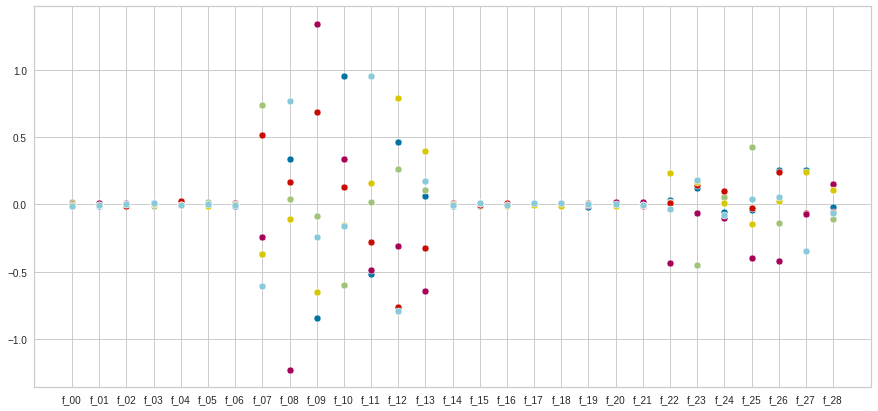

In [39]:
plt.figure(figsize=(15, 7))
for i in range(gmm.means_.shape[0]):
  sns.scatterplot(x=np.arange(df_transformed.shape[1]), y=gmm.means_[i])
plt.xticks(ticks=np.arange(df_transformed.shape[1]), labels=df_proc.columns)
plt.show()


As we see, some features have no effect on the mean value. It equals 0. Let's try to remove them.

In [42]:
cols = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']

# features power tranformations
pt = PowerTransformer()
df_transformed = pt.fit_transform(df_proc[cols])

# dimention reduction 
pca = PCA(0.80)
df_reduced = pca.fit_transform(df_transformed)

# modeling
gmm = GaussianMixture(n_components=6, random_state=42).fit(df_reduced)
labels = gmm.predict(df_reduced)

# score
print(gmm.bic(df_reduced), gmm.aic(df_reduced))

2816497.802940943 2812748.17745167


### Submit results

In [43]:
frame = {'Id': submit_id, 'Predicted': pd.Series(labels)}
submit = pd.DataFrame(frame).set_index('Id')
submit.to_csv('/datasets/MyDrive/datasets/submit.csv')